Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week3.php" -OutFile "week3.csv"

# id:13-13--13 

https://github.com/Chenmo1212/TCD-Machine_Learning/blob/main/00_Weekly%20Assignments(ML)/02_Week_3/02_Jupyter/Untitled.ipynb

In [88]:
import numpy as np
data = np.loadtxt('week3.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]

In [89]:
from sklearn.model_selection import train_test_split

# Use the train:test to divide the dataset with a ratio of 2:8
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Question (i)a

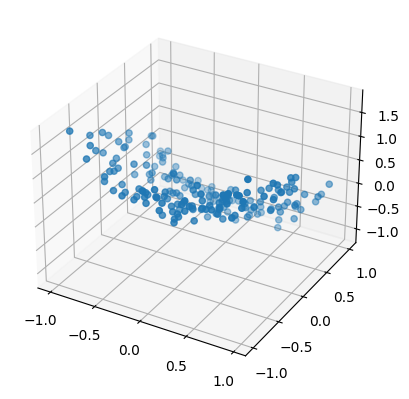

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

Question i(b)

In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

def lasso_regression_model(x, y, model_name, degree_poly, test_c_vals):
    x_poly = PolynomialFeatures(degree_poly).fit_transform(x)
    results_dfs = []

    for c in test_c_vals:
        if model_name == 'Lasso':
            model = Lasso(alpha=1 / (2 * c))
        elif model_name == 'Ridge':
            model = Ridge(alpha=1 / (2 * c))

        model.fit(x_poly, y)

        result_dict = {
            'C_value': c,
            'coefficient': np.around(model.coef_, decimals=2),
            'intercept': model.intercept_
        }

        results_dfs.append(pd.DataFrame([result_dict]))

    model_results = pd.concat(results_dfs, ignore_index=True)
    return model_results

# Define your X and y here

C_values = [1, 10, 100, 1000]
model_name = 'Lasso'

for degree_poly in range(len(C_values)):
    result = lasso_regression_model(X, y, model_name, degree_poly, C_values)
    with pd.option_context('display.max_colwidth', 400):
        print(f'Parameters for degree of polynomial feature = {degree_poly}')
        display(result)


Parameters for degree of polynomial feature = 0


,C_value,coefficient,intercept
0,1,[0.0],0.320287
1,10,[0.0],0.320287
2,100,[0.0],0.320287
3,1000,[0.0],0.320287


Parameters for degree of polynomial feature = 1


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.82]",0.313954
2,100,"[0.0, 0.01, -0.95]",0.312879
3,1000,"[0.0, 0.02, -0.97]",0.312610


Parameters for degree of polynomial feature = 2


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.84, 0.37, -0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.99, 0.86, 0.0, -0.06]",0.053157
3,1000,"[0.0, 0.01, -1.0, 0.91, 0.0, -0.1]",0.055228


Parameters for degree of polynomial feature = 3


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.320287
1,10,"[0.0, 0.0, -0.84, 0.37, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0]",0.194530
2,100,"[0.0, 0.0, -0.94, 0.86, 0.0, -0.05, 0.0, 0.0, 0.0, -0.09]",0.052418
3,1000,"[0.0, 0.01, -0.91, 0.91, 0.0, -0.1, -0.0, 0.03, -0.0, -0.16]",0.053745


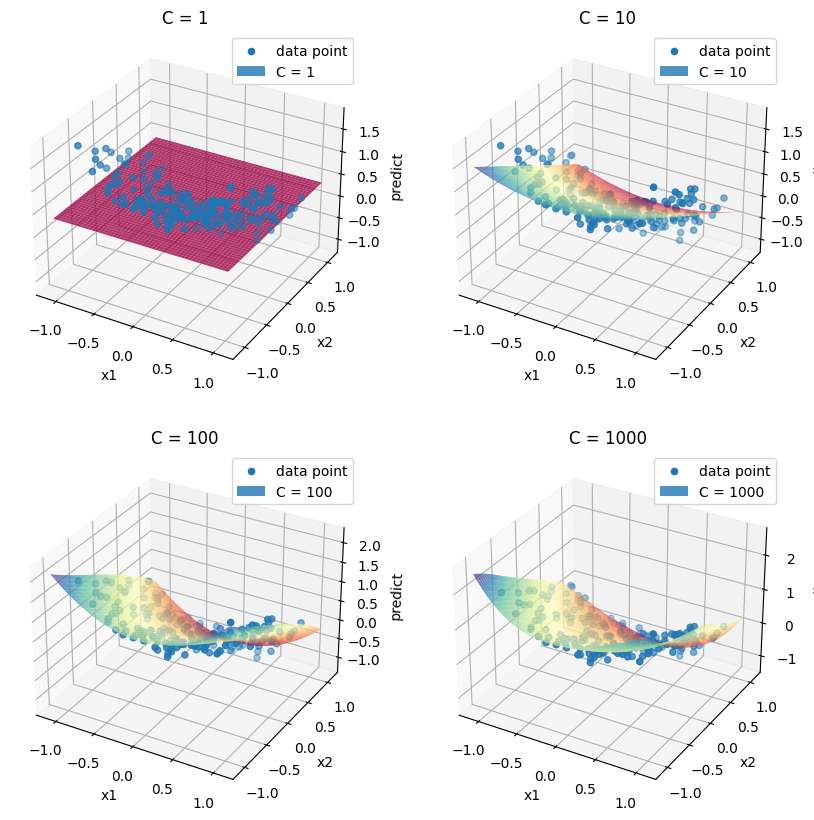

In [92]:
from sklearn.pipeline import Pipeline

def LassoRegression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Lasso(alpha=alpha))
    ])


model_list = []
for c in C_values:
    reg = LassoRegression(5, 1/(2*c))
    model = reg.fit(x_train, y_train)
    pred = reg.predict(x_test)

    
    model_list.append(model)
	
	
fig = plt.figure(figsize=(10,10))

x1 = np.linspace(X[:, 0].min()-0.1, X[:, 0].max()+0.1)
x2 = np.linspace(X[:, 1].min()-0.1, X[:, 1].max()+0.1)
X1, X2 = np.meshgrid(x1, x2)

sub = [221, 222, 223, 224]
for i in range(1, len(model_list) + 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('predict')
    
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], label="data point")
    
    Z = []
    for j in range(len(X1)):
        temp = np.column_stack((X1[j], X2[j]))
        Z.append(model_list[i - 1].predict(temp))
    Z = np.array(Z)
    
    surf = ax.plot_surface(X1, X2, Z, label="C = {}".format(C_values[i - 1]), cmap=plt.cm.Spectral, alpha=0.8)
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    plt.legend()
    plt.title("C = {}".format(C_values[i - 1]))
plt.show()